In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install textblob
from textblob import TextBlob

In [2]:
from google.colab import files
uploaded = files.upload()

# Assuming the file name is 'movies.csv'
df = pd.read_csv('dataset.csv')

Saving dataset.csv to dataset.csv


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   review_id           4990 non-null   object
 1   product_id          4990 non-null   object
 2   title               4990 non-null   object
 3   author              4989 non-null   object
 4   rating              4990 non-null   int64 
 5   content             4982 non-null   object
 6   timestamp           4990 non-null   object
 7   profile_id          4990 non-null   object
 8   is_verified         4990 non-null   int64 
 9   helpful_count       4990 non-null   int64 
 10  product_attributes  4766 non-null   object
dtypes: int64(3), object(8)
memory usage: 429.0+ KB


In [4]:
df.head()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,R1TIU27G892G8N,B09GJVTRNZ,5.0 out of 5 stars Best for modern music; fine...,Glut & Lack: troublemaking twins,5,Love this little speaker for the music I (and ...,"Reviewed in the United States January 14, 2025",AEMU5GYR7E7YH5B64AKBUNZ5Y4PA,1,19,"Color: Blue, Style: Flip 6"
1,R3UHPD69SUVF4D,B09GJVTRNZ,5.0 out of 5 stars Incredible Sound and Perfor...,Seva,5,I recently bought the JBL Flip 6 Portable Blue...,"Reviewed in the United States January 4, 2025",AF2OOF3FJWVX65HP72K6CVPMONRA,1,14,"Color: Teal, Style: Flip 6"
2,R8ZPP4M7T18BO,B09GJVTRNZ,5.0 out of 5 stars The Sound Is Great,Michelle,5,I'm so glad I bought this. I use it daily I ha...,"Reviewed in the United States April 16, 2025",AHHSFRGEAFWTV24U7MFCK7V54P7Q,1,1,"Color: Blue, Style: Flip 6"
3,R3T9HSXO492VDG,B09GJVTRNZ,5.0 out of 5 stars Incredible Sound and Durabi...,Paola J Franco,5,The sound quality is amazing for such a compac...,"Reviewed in the United States February 28, 2025",AGIUPLMVY4PLRDFR6DCBYAG53LWQ,1,6,"Color: White, Style: Flip 6"
4,RF4X9MUCFL4QZ,B09GJVTRNZ,5.0 out of 5 stars Not too small Not too big,Nikki Fox,5,"These are not huge, but great for my sports pl...","Reviewed in the United States April 17, 2025",AEP7HYGSBZ5Q2DII5UM2CWYXUQUA,1,1,"Color: Blue, Style: Flip 6"


In [5]:
# I have chosen earbuds. So, I'm only mapping the earbuds products.
product_mapping = {
    'B07PXGQC1Q': 'Apple AirPods with Charging Case (2nd Generation)',
    'B0863H1JKB': 'Panasonic True Wireless Earbuds (RZ-S300W Series)',
    'B08ZR5JB9G': 'Sennheiser CX True Wireless Earbuds',
    'B096SV8SJG': 'Beats Studio Buds – True Wireless Noise Cancelling Earbuds',
    'B093SLWMS7': 'Soundcore by Anker Life P3 Noise Cancelling Earbuds'
}

In [6]:
df['product_name'] = df['product_id'].map(product_mapping)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   review_id           4990 non-null   object
 1   product_id          4990 non-null   object
 2   title               4990 non-null   object
 3   author              4989 non-null   object
 4   rating              4990 non-null   int64 
 5   content             4982 non-null   object
 6   timestamp           4990 non-null   object
 7   profile_id          4990 non-null   object
 8   is_verified         4990 non-null   int64 
 9   helpful_count       4990 non-null   int64 
 10  product_attributes  4766 non-null   object
 11  product_name        451 non-null    object
dtypes: int64(3), object(9)
memory usage: 467.9+ KB


In [8]:
df_cleaned = df.dropna(subset = ['product_name']) # This helps us to retain the rows with the product names

In [9]:
df_cleaned

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes,product_name
445,RUUJJA0TERA67,B096SV8SJG,5.0 out of 5 stars Compared to 4 other Earbuds...,Connor,5,I bought these earbuds along with 4 other pair...,"Reviewed in the United States August 11, 2022",AFEITP6Y25NKH3KB2LXWQCC7STIA,1,2277,Color: BlackStyle: Studio BudsSet: Without App...,Beats Studio Buds – True Wireless Noise Cancel...
446,R3EO2GBST2UICI,B096SV8SJG,5.0 out of 5 stars Initial review and comparis...,philip seitz,5,I love these earbuds. They feel definitely wor...,"Reviewed in the United States September 28, 2023",AFMDCDCHBIWSEI6RDYBCY4MXXVZQ,1,562,Color: BlackStyle: Studio BudsSet: Without App...,Beats Studio Buds – True Wireless Noise Cancel...
447,R2D114QWXW4IOU,B096SV8SJG,5.0 out of 5 stars I think they’re great,Maizy,5,I like the sound a lot. I read a previous revi...,"Reviewed in the United States July 27, 2024",AFRVRGYJJSBAELQK6XVCXXBCJXLA,1,3,Color: BlackStyle: Studio BudsSet: Without App...,Beats Studio Buds – True Wireless Noise Cancel...
448,R29LYUZ7DI2CS6,B096SV8SJG,"4.0 out of 5 stars Quality sound and build, BU...",Everest,4,"After using these for a couple weeks straight,...","Reviewed in the United States August 3, 2024",AEDBORE5CT34E6D7QVXFZW5ZERCA,1,0,Color: BlackStyle: Studio BudsSet: Without App...,Beats Studio Buds – True Wireless Noise Cancel...
449,RRC5SI8P44LH4,B096SV8SJG,5.0 out of 5 stars Excellent -- Budget Friendl...,Mary Trotta,5,Been a few months (May 2024) since the purchas...,"Reviewed in the United States July 21, 2024",AGRC63RAW4DZCOTB2NDTUFP7SRFA,1,3,Color: Sunset PinkStyle: Studio BudsSet: Witho...,Beats Studio Buds – True Wireless Noise Cancel...
...,...,...,...,...,...,...,...,...,...,...,...,...
3252,R1YVAGI1DPUZIR,B0863H1JKB,5.0 out of 5 stars Excellent,Crystal,5,My husband loves them and uses them every day ...,"Reviewed in the United States February 8, 2021",AG5FFGYZNS52BKCWVTY2NSC7JFOQ,1,0,Color: Black,Panasonic True Wireless Earbuds (RZ-S300W Series)
3253,R2BY3QXXPR1LZ7,B0863H1JKB,5.0 out of 5 stars Nice and compact,jaystew,5,Bought these ear buds as a gift. I love the co...,"Reviewed in the United States December 21, 2020",AEEQX62BONKUNZIX3SQMGHJ6R3OQ,1,0,Color: Green,Panasonic True Wireless Earbuds (RZ-S300W Series)
3254,R3UAA5PNG2WULN,B0863H1JKB,"1.0 out of 5 stars Worked amazing, but build q...",XxR063RxX,1,I really liked these headphones. I had these f...,"Reviewed in the United States November 18, 2020",AH33SSAVU5PHHKJ277SONCSGC4QQ,1,1,Color: Black,Panasonic True Wireless Earbuds (RZ-S300W Series)
3255,R1XF7XZ08TFQXY,B0863H1JKB,2.0 out of 5 stars Not worth it !!,Lily Matias,2,I purchased my set on September 2020 and after...,"Reviewed in the United States February 23, 2021",AGZMVSH3WGJLTMZZXTICYZ7WFF7A,1,0,Color: White,Panasonic True Wireless Earbuds (RZ-S300W Series)


In [10]:
ratings = df['rating'].values

In [11]:
mean_rating = np.nanmean(ratings)
ratings = np.where(np.isnan(ratings), mean_rating, ratings)
df['Rating'] = ratings  # Assign back to DataFrame

In [12]:
valid_ratings = ratings[(ratings >= 0) & (ratings <= 5)]
df = df[df['Rating'].isin(valid_ratings)]  # Keep only valid ratings

In [13]:
review_lengths = np.array([len(review.split()) for review in df['title']])

In [14]:
# Min-Max scaling using NumPy
min_rating = np.min(ratings)
max_rating = np.max(ratings)
normalized_ratings = (ratings - min_rating) / (max_rating - min_rating)
df['Normalized_Rating'] = normalized_ratings

In [15]:
# Ensure ratings are in float format
df['Rating'] = df['Rating'].astype(np.float64)

In [16]:
# Combine the cleaned ratings and review lengths into a new array and save it
np.savetxt('cleaned_reviews.csv', np.column_stack((ratings, review_lengths)), delimiter=",", fmt='%s', header="Rating,Review Length")

In [17]:
df1 = pd.read_csv('cleaned_reviews.csv')

In [18]:
df_cleaned

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes,product_name
445,RUUJJA0TERA67,B096SV8SJG,5.0 out of 5 stars Compared to 4 other Earbuds...,Connor,5,I bought these earbuds along with 4 other pair...,"Reviewed in the United States August 11, 2022",AFEITP6Y25NKH3KB2LXWQCC7STIA,1,2277,Color: BlackStyle: Studio BudsSet: Without App...,Beats Studio Buds – True Wireless Noise Cancel...
446,R3EO2GBST2UICI,B096SV8SJG,5.0 out of 5 stars Initial review and comparis...,philip seitz,5,I love these earbuds. They feel definitely wor...,"Reviewed in the United States September 28, 2023",AFMDCDCHBIWSEI6RDYBCY4MXXVZQ,1,562,Color: BlackStyle: Studio BudsSet: Without App...,Beats Studio Buds – True Wireless Noise Cancel...
447,R2D114QWXW4IOU,B096SV8SJG,5.0 out of 5 stars I think they’re great,Maizy,5,I like the sound a lot. I read a previous revi...,"Reviewed in the United States July 27, 2024",AFRVRGYJJSBAELQK6XVCXXBCJXLA,1,3,Color: BlackStyle: Studio BudsSet: Without App...,Beats Studio Buds – True Wireless Noise Cancel...
448,R29LYUZ7DI2CS6,B096SV8SJG,"4.0 out of 5 stars Quality sound and build, BU...",Everest,4,"After using these for a couple weeks straight,...","Reviewed in the United States August 3, 2024",AEDBORE5CT34E6D7QVXFZW5ZERCA,1,0,Color: BlackStyle: Studio BudsSet: Without App...,Beats Studio Buds – True Wireless Noise Cancel...
449,RRC5SI8P44LH4,B096SV8SJG,5.0 out of 5 stars Excellent -- Budget Friendl...,Mary Trotta,5,Been a few months (May 2024) since the purchas...,"Reviewed in the United States July 21, 2024",AGRC63RAW4DZCOTB2NDTUFP7SRFA,1,3,Color: Sunset PinkStyle: Studio BudsSet: Witho...,Beats Studio Buds – True Wireless Noise Cancel...
...,...,...,...,...,...,...,...,...,...,...,...,...
3252,R1YVAGI1DPUZIR,B0863H1JKB,5.0 out of 5 stars Excellent,Crystal,5,My husband loves them and uses them every day ...,"Reviewed in the United States February 8, 2021",AG5FFGYZNS52BKCWVTY2NSC7JFOQ,1,0,Color: Black,Panasonic True Wireless Earbuds (RZ-S300W Series)
3253,R2BY3QXXPR1LZ7,B0863H1JKB,5.0 out of 5 stars Nice and compact,jaystew,5,Bought these ear buds as a gift. I love the co...,"Reviewed in the United States December 21, 2020",AEEQX62BONKUNZIX3SQMGHJ6R3OQ,1,0,Color: Green,Panasonic True Wireless Earbuds (RZ-S300W Series)
3254,R3UAA5PNG2WULN,B0863H1JKB,"1.0 out of 5 stars Worked amazing, but build q...",XxR063RxX,1,I really liked these headphones. I had these f...,"Reviewed in the United States November 18, 2020",AH33SSAVU5PHHKJ277SONCSGC4QQ,1,1,Color: Black,Panasonic True Wireless Earbuds (RZ-S300W Series)
3255,R1XF7XZ08TFQXY,B0863H1JKB,2.0 out of 5 stars Not worth it !!,Lily Matias,2,I purchased my set on September 2020 and after...,"Reviewed in the United States February 23, 2021",AGZMVSH3WGJLTMZZXTICYZ7WFF7A,1,0,Color: White,Panasonic True Wireless Earbuds (RZ-S300W Series)


In [19]:
df_cleaned.isnull()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes,product_name
445,False,False,False,False,False,False,False,False,False,False,False,False
446,False,False,False,False,False,False,False,False,False,False,False,False
447,False,False,False,False,False,False,False,False,False,False,False,False
448,False,False,False,False,False,False,False,False,False,False,False,False
449,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3252,False,False,False,False,False,False,False,False,False,False,False,False
3253,False,False,False,False,False,False,False,False,False,False,False,False
3254,False,False,False,False,False,False,False,False,False,False,False,False
3255,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
print("Mean:", df_cleaned['rating'].mean())
print("Median:", df_cleaned['rating'].median())
print("Mode:", df_cleaned['rating'].mode()[0])
print("Variance:", df_cleaned['rating'].var())
print("Standard Deviation:", df_cleaned['rating'].std())

Mean: 4.308203991130821
Median: 5.0
Mode: 5
Variance: 0.9247992116284803
Standard Deviation: 0.9616648125144646


In [21]:
missing_values = df_cleaned.isnull().sum()
print("Missing Values:/n", missing_values)

Missing Values:/n review_id              0
product_id             0
title                  0
author                 1
rating                 0
content                0
timestamp              0
profile_id             0
is_verified            0
helpful_count          0
product_attributes    14
product_name           0
dtype: int64


In [22]:
df_cleaned['author'].dropna()
df_cleaned['product_attributes'].dropna()

,product_attributes
445,Color: BlackStyle: Studio BudsSet: Without App...
446,Color: BlackStyle: Studio BudsSet: Without App...
447,Color: BlackStyle: Studio BudsSet: Without App...
448,Color: BlackStyle: Studio BudsSet: Without App...
449,Color: Sunset PinkStyle: Studio BudsSet: Witho...
...,...
3252,Color: Black
3253,Color: Green
3254,Color: Black
3255,Color: White


In [23]:
Q1 = df['helpful_count'].quantile(0.25)
Q3 = df['helpful_count'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['helpful_count'] < (Q1 - 1.5 * IQR)) | (df['helpful_count'] > (Q3 + 1.5 * IQR))]
print("Outliers:\\n", outliers)

Outliers:\n            review_id  product_id  \
0     R1TIU27G892G8N  B09GJVTRNZ   
1     R3UHPD69SUVF4D  B09GJVTRNZ   
3     R3T9HSXO492VDG  B09GJVTRNZ   
6     R10OYPR2PM63QE  B09GJVTRNZ   
8     R1AEL2WD0Y69DS  B0BYC52LYP   
...              ...         ...   
4158  R3P0ZU3HAN88XL  B09D1HMBQ3   
4164  R27OCI9LEZAE48  B09D1HMBQ3   
4180    RNNVCXV5NHGY  B09D1HMBQ3   
4192  R1FC1OX21ULYQ4  B09D1HMBQ3   
4195  R3BD8HBG0V93JP  B09D1HMBQ3   

                                                  title  \
0     5.0 out of 5 stars Best for modern music; fine...   
1     5.0 out of 5 stars Incredible Sound and Perfor...   
3     5.0 out of 5 stars Incredible Sound and Durabi...   
6              5.0 out of 5 stars Great sound and value   
8     5.0 out of 5 stars Ultimate Ears best portable...   
...                                                 ...   
4158      4.0 out of 5 stars Difficult to open the case   
4164            3.0 out of 5 stars Bought new, got used   
4180  5.0 out of 5 stars

In [24]:
print("Mean:", df_cleaned['helpful_count'].mean())
print("Median:", df_cleaned['helpful_count'].median())
print("Mode:", df_cleaned['helpful_count'].mode()[0])
print("Variance:", df_cleaned['helpful_count'].var())
print("Standard Deviation:", df_cleaned['helpful_count'].std())

Mean: 23.274944567627493
Median: 0.0
Mode: 0
Variance: 32412.13312638597
Standard Deviation: 180.0336999741603


In [25]:
Q1 = df['rating'].quantile(0.25)
Q3 = df['rating'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['rating'] < (Q1 - 1.5 * IQR)) | (df['rating'] > (Q3 + 1.5 * IQR))]
print("Outliers:\n", outliers)

Outliers:
            review_id  product_id  \
32    R3VSRCQEMEOC7B  B0DYB6KMJH   
43    R3S9NKQ7M06LYP  B0BW34LCB8   
48     RWYK1GXIVV6H1  B09PYVXXW5   
50    R2XA1MES3TJ3W5  B09PYVXXW5   
59    R3H14FR01F7EJW  B09PYVXXW5   
...              ...         ...   
4984   RMJNP14ENJLS4  B0CY6S748H   
4986   RERGCQ3PLJUTJ  B0CY6S748H   
4987  R25VEKRF5EV836  B0CY6S748H   
4988  R34PNR72XAULLC  B0CY6S748H   
4989  R1GHYH6N4V9BRB  B0CY6S748H   

                                                  title        author  rating  \
32    1.0 out of 5 stars $199 for an ULT button? Hmm...  88xpressions       1   
43    1.0 out of 5 stars Want my money back. Utterly...       CPalmer       1   
48              1.0 out of 5 stars Decent but Defective        Aquila       1   
50    2.0 out of 5 stars Wish I had believed the neg...         Devin       2   
59                         2.0 out of 5 stars Not great           Ben       2   
...                                                 ...           ... 

In [26]:
df_cleaned.to_csv('cleaned_data.csv', index=False)

In [27]:
df_cleaned

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes,product_name
445,RUUJJA0TERA67,B096SV8SJG,5.0 out of 5 stars Compared to 4 other Earbuds...,Connor,5,I bought these earbuds along with 4 other pair...,"Reviewed in the United States August 11, 2022",AFEITP6Y25NKH3KB2LXWQCC7STIA,1,2277,Color: BlackStyle: Studio BudsSet: Without App...,Beats Studio Buds – True Wireless Noise Cancel...
446,R3EO2GBST2UICI,B096SV8SJG,5.0 out of 5 stars Initial review and comparis...,philip seitz,5,I love these earbuds. They feel definitely wor...,"Reviewed in the United States September 28, 2023",AFMDCDCHBIWSEI6RDYBCY4MXXVZQ,1,562,Color: BlackStyle: Studio BudsSet: Without App...,Beats Studio Buds – True Wireless Noise Cancel...
447,R2D114QWXW4IOU,B096SV8SJG,5.0 out of 5 stars I think they’re great,Maizy,5,I like the sound a lot. I read a previous revi...,"Reviewed in the United States July 27, 2024",AFRVRGYJJSBAELQK6XVCXXBCJXLA,1,3,Color: BlackStyle: Studio BudsSet: Without App...,Beats Studio Buds – True Wireless Noise Cancel...
448,R29LYUZ7DI2CS6,B096SV8SJG,"4.0 out of 5 stars Quality sound and build, BU...",Everest,4,"After using these for a couple weeks straight,...","Reviewed in the United States August 3, 2024",AEDBORE5CT34E6D7QVXFZW5ZERCA,1,0,Color: BlackStyle: Studio BudsSet: Without App...,Beats Studio Buds – True Wireless Noise Cancel...
449,RRC5SI8P44LH4,B096SV8SJG,5.0 out of 5 stars Excellent -- Budget Friendl...,Mary Trotta,5,Been a few months (May 2024) since the purchas...,"Reviewed in the United States July 21, 2024",AGRC63RAW4DZCOTB2NDTUFP7SRFA,1,3,Color: Sunset PinkStyle: Studio BudsSet: Witho...,Beats Studio Buds – True Wireless Noise Cancel...
...,...,...,...,...,...,...,...,...,...,...,...,...
3252,R1YVAGI1DPUZIR,B0863H1JKB,5.0 out of 5 stars Excellent,Crystal,5,My husband loves them and uses them every day ...,"Reviewed in the United States February 8, 2021",AG5FFGYZNS52BKCWVTY2NSC7JFOQ,1,0,Color: Black,Panasonic True Wireless Earbuds (RZ-S300W Series)
3253,R2BY3QXXPR1LZ7,B0863H1JKB,5.0 out of 5 stars Nice and compact,jaystew,5,Bought these ear buds as a gift. I love the co...,"Reviewed in the United States December 21, 2020",AEEQX62BONKUNZIX3SQMGHJ6R3OQ,1,0,Color: Green,Panasonic True Wireless Earbuds (RZ-S300W Series)
3254,R3UAA5PNG2WULN,B0863H1JKB,"1.0 out of 5 stars Worked amazing, but build q...",XxR063RxX,1,I really liked these headphones. I had these f...,"Reviewed in the United States November 18, 2020",AH33SSAVU5PHHKJ277SONCSGC4QQ,1,1,Color: Black,Panasonic True Wireless Earbuds (RZ-S300W Series)
3255,R1XF7XZ08TFQXY,B0863H1JKB,2.0 out of 5 stars Not worth it !!,Lily Matias,2,I purchased my set on September 2020 and after...,"Reviewed in the United States February 23, 2021",AGZMVSH3WGJLTMZZXTICYZ7WFF7A,1,0,Color: White,Panasonic True Wireless Earbuds (RZ-S300W Series)


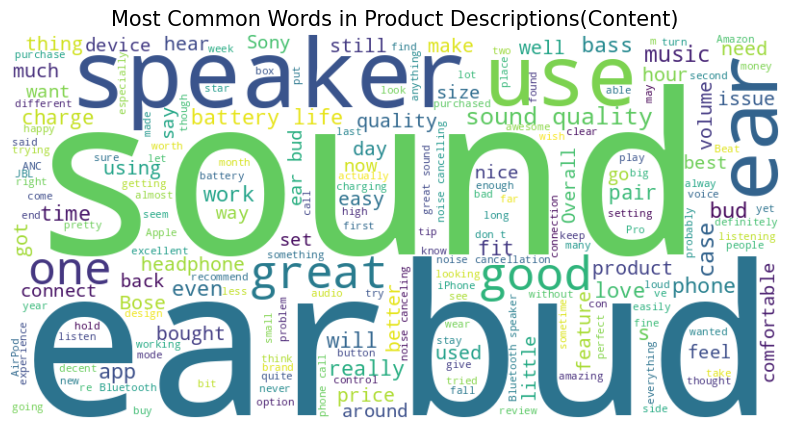

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all review descriptions into one string
text = " ".join(review for review in df['content'].dropna())

# Generate a wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Product Descriptions(Content)", fontsize=15)
plt.show()

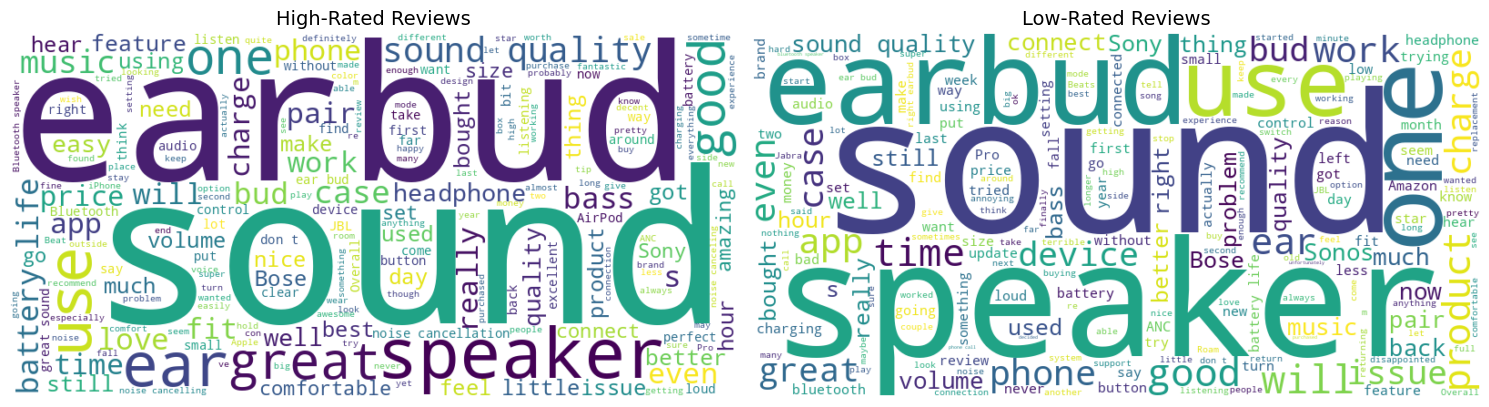

In [29]:
# Separate high-rated and low-rated reviews
high_rated = " ".join(review for review in df[df['rating'] >= 4]['content'].dropna())
low_rated = " ".join(review for review in df[df['rating'] <= 2]['content'].dropna())

# Generate high-rated wordcloud
high_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(high_rated)

# Generate low-rated wordcloud
low_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(low_rated)

# Display the wordclouds side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs[0].imshow(high_wordcloud, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title("High-Rated Reviews", fontsize=14)

axs[1].imshow(low_wordcloud, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title("Low-Rated Reviews", fontsize=14)

plt.tight_layout()
plt.show()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
/tmp/ipython-input-882511084.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=common_words_df, palette='viridis')


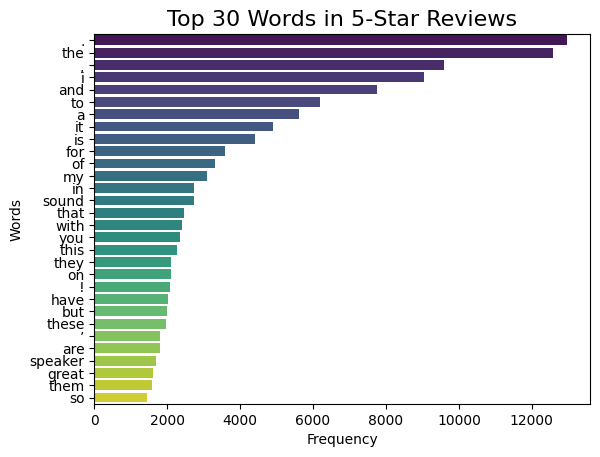

In [30]:
from collections import Counter
import seaborn as sns
import nltk
nltk.download('punkt_tab')

# Tokenize the review descriptions for 5-star reviews
from nltk.tokenize import word_tokenize

five_star_reviews = " ".join(review for review in df[df['rating'] == 5]['content'].dropna())
tokens = word_tokenize(five_star_reviews.lower())

# Count word frequencies
common_words = Counter(tokens).most_common(30)

# Create a DataFrame for plotting
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Plot the bar chart
sns.barplot(x='Count', y='Word', data=common_words_df, palette='viridis')
plt.title("Top 30 Words in 5-Star Reviews", fontsize=16)
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

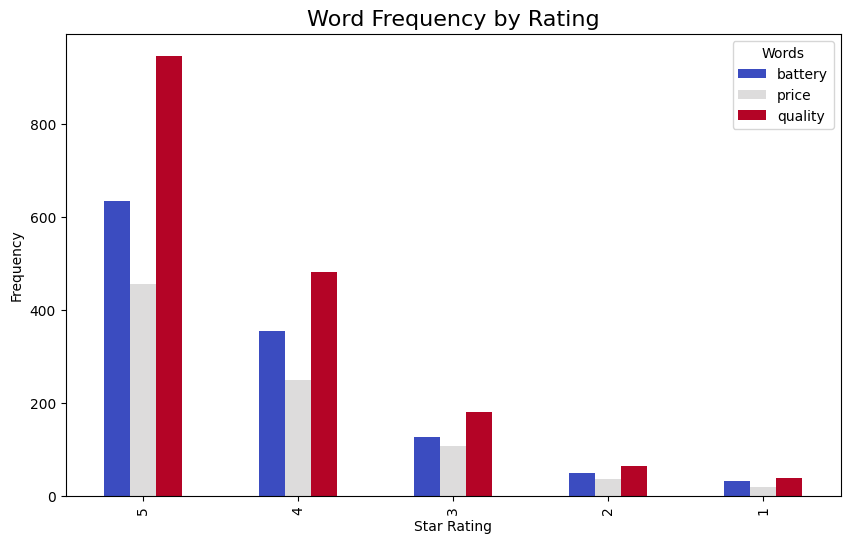

In [31]:
# Define words to compare
words_to_compare = ['battery', 'price', 'quality']

# Count occurrences of each word by rating
word_freq_by_rating = {word: df[df['content'].str.contains(word, case=False, na=False)]['rating'].value_counts() for word in words_to_compare}

# Create a DataFrame for plotting
freq_df = pd.DataFrame(word_freq_by_rating).fillna(0)

# Plot as a bar chart
freq_df.plot(kind='bar', figsize=(10, 6), colormap='coolwarm')
plt.title("Word Frequency by Rating", fontsize=16)
plt.xlabel("Star Rating")
plt.ylabel("Frequency")
plt.legend(title="Words", loc='upper right')
plt.show()


/tmp/ipython-input-1666150264.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_name', y='rating', data=avg_rating, palette='muted')


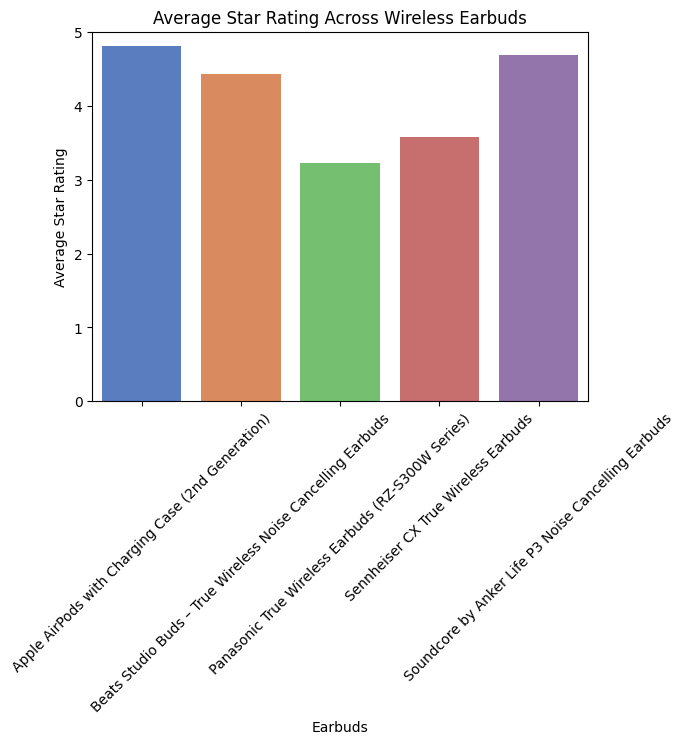

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average star rating for each product
avg_rating = df.groupby('product_name')['rating'].mean().reset_index()

# Plot the average ratings
sns.barplot(x='product_name', y='rating', data=avg_rating, palette='muted')
plt.title("Average Star Rating Across Wireless Earbuds")
plt.xlabel("Earbuds")
plt.ylabel("Average Star Rating")
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.show()

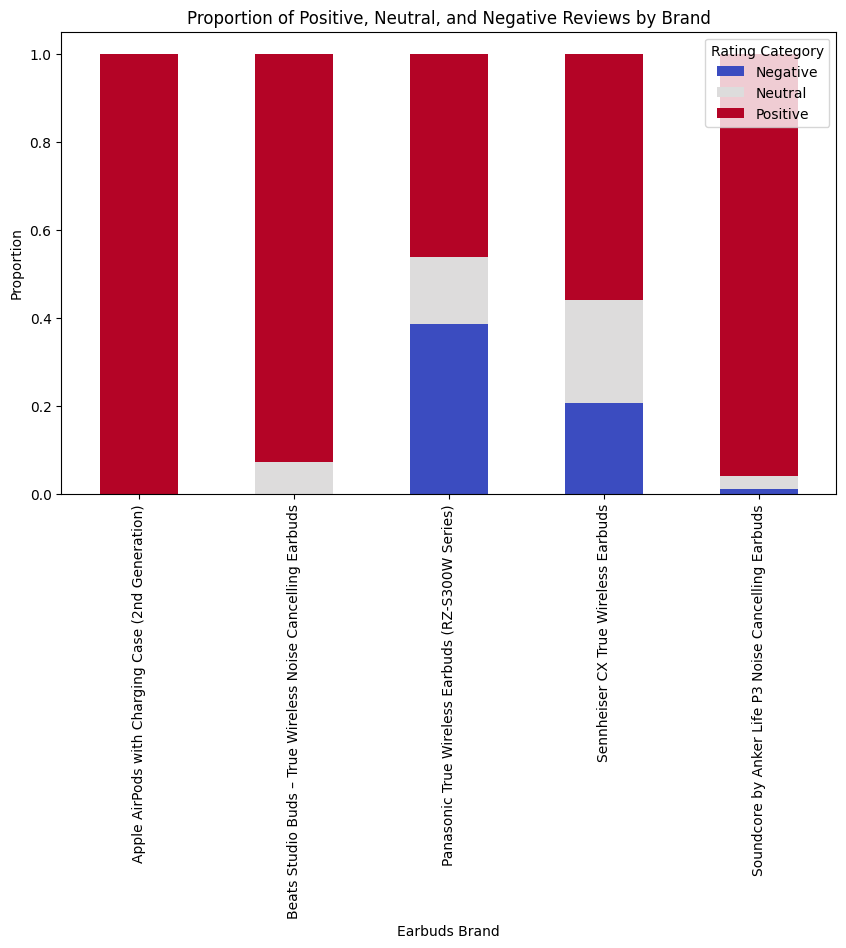

In [33]:
# Define rating categories
def categorize_rating(stars):
    if stars >= 4:
        return 'Positive'
    elif stars == 3:
        return 'Neutral'
    else:
        return 'Negative'

# Add a new column for rating categories
df['Rating Category'] = df['rating'].apply(categorize_rating)

# Calculate proportions by product
rating_proportions = df.groupby(['product_name', 'Rating Category']).size().unstack(fill_value=0)
rating_proportions = rating_proportions.div(rating_proportions.sum(axis=1), axis=0)

# Plot the proportions
rating_proportions.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title("Proportion of Positive, Neutral, and Negative Reviews by Brand")
plt.xlabel("Earbuds Brand")
plt.ylabel("Proportion")
plt.legend(title="Rating Category", loc="upper right")
plt.xticks(rotation=90)
plt.show()

/tmp/ipython-input-2166400554.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='product_name', y='rating', data=df, palette='Set3')


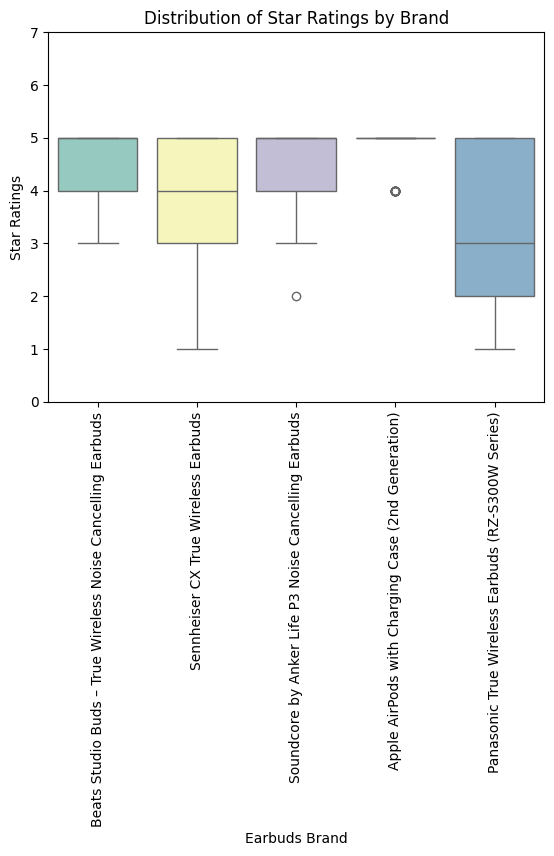

In [34]:
# Box plot of star ratings by brand
sns.boxplot(x='product_name', y='rating', data=df, palette='Set3')
plt.title("Distribution of Star Ratings by Brand")
plt.xlabel("Earbuds Brand")
plt.ylabel("Star Ratings")
plt.xticks(rotation=90)
plt.ylim(0, 7)
plt.show()

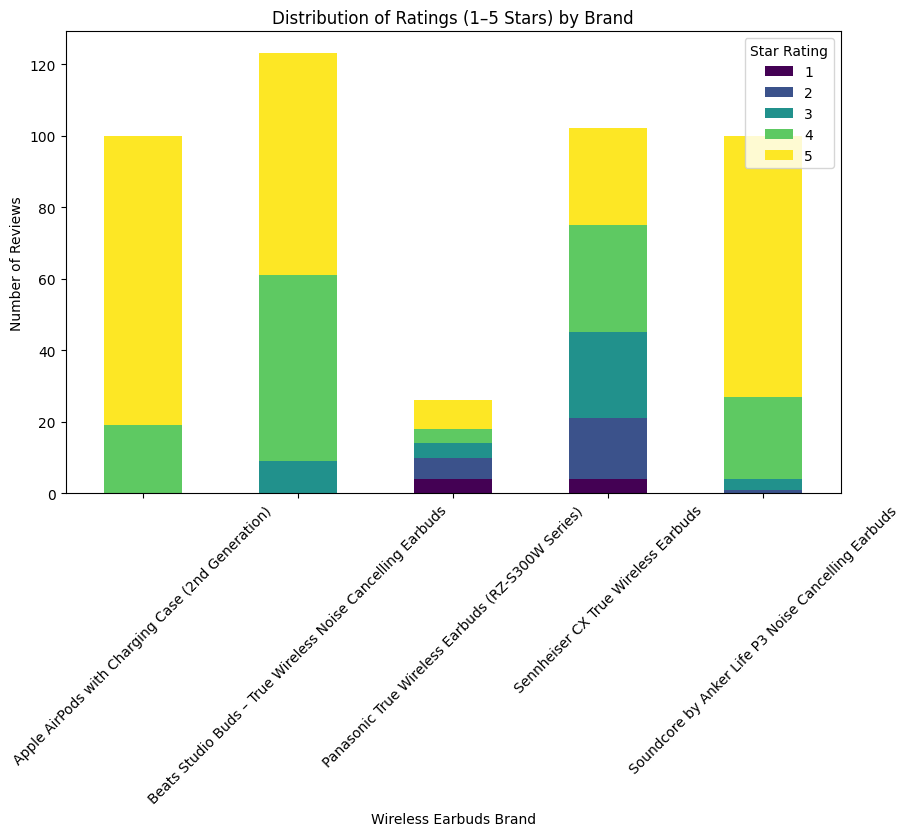

In [35]:
# Count the number of each star rating per product
rating_counts = df.groupby(['product_name', 'rating']).size().unstack(fill_value=0)

# Plot the stacked bar chart
rating_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Distribution of Ratings (1–5 Stars) by Brand")
plt.xlabel("Wireless Earbuds Brand")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.legend(title="Star Rating", loc="upper right")
plt.show()

/tmp/ipython-input-441158239.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_name', y='rating', data=avg_rating, palette="muted")


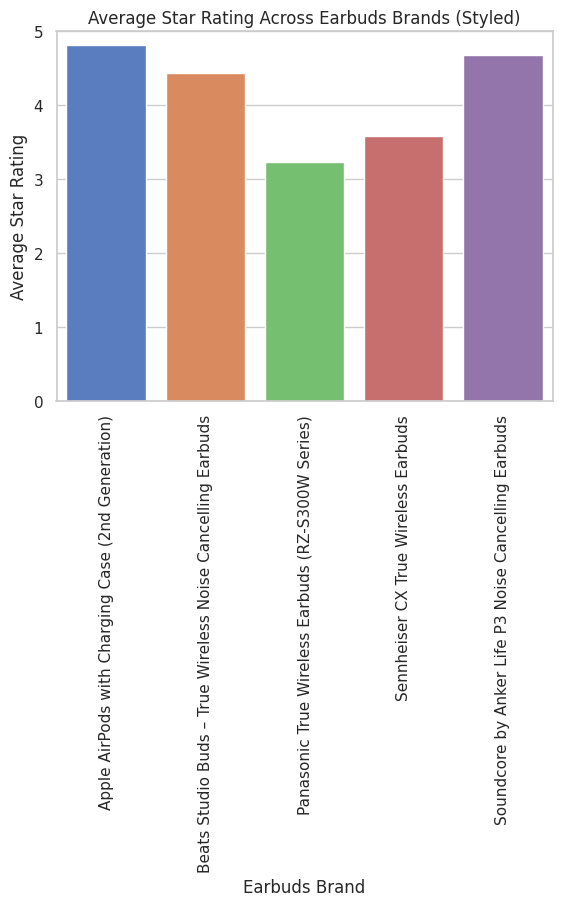

In [36]:
import seaborn as sns

# Set a Seaborn theme
sns.set_theme(style="whitegrid", palette="pastel")

# Replot a bar chart with the new theme
sns.barplot(x='product_name', y='rating', data=avg_rating, palette="muted")
plt.title("Average Star Rating Across Earbuds Brands (Styled)")
plt.xlabel("Earbuds Brand")
plt.ylabel("Average Star Rating")
plt.xticks(rotation=90)
plt.ylim(0, 5)
plt.show()

In [41]:
df_cleaned.head()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes,product_name
445,RUUJJA0TERA67,B096SV8SJG,5.0 out of 5 stars Compared to 4 other Earbuds...,Connor,5,I bought these earbuds along with 4 other pair...,"Reviewed in the United States August 11, 2022",AFEITP6Y25NKH3KB2LXWQCC7STIA,1,2277,Color: BlackStyle: Studio BudsSet: Without App...,Beats Studio Buds – True Wireless Noise Cancel...
446,R3EO2GBST2UICI,B096SV8SJG,5.0 out of 5 stars Initial review and comparis...,philip seitz,5,I love these earbuds. They feel definitely wor...,"Reviewed in the United States September 28, 2023",AFMDCDCHBIWSEI6RDYBCY4MXXVZQ,1,562,Color: BlackStyle: Studio BudsSet: Without App...,Beats Studio Buds – True Wireless Noise Cancel...
447,R2D114QWXW4IOU,B096SV8SJG,5.0 out of 5 stars I think they’re great,Maizy,5,I like the sound a lot. I read a previous revi...,"Reviewed in the United States July 27, 2024",AFRVRGYJJSBAELQK6XVCXXBCJXLA,1,3,Color: BlackStyle: Studio BudsSet: Without App...,Beats Studio Buds – True Wireless Noise Cancel...
448,R29LYUZ7DI2CS6,B096SV8SJG,"4.0 out of 5 stars Quality sound and build, BU...",Everest,4,"After using these for a couple weeks straight,...","Reviewed in the United States August 3, 2024",AEDBORE5CT34E6D7QVXFZW5ZERCA,1,0,Color: BlackStyle: Studio BudsSet: Without App...,Beats Studio Buds – True Wireless Noise Cancel...
449,RRC5SI8P44LH4,B096SV8SJG,5.0 out of 5 stars Excellent -- Budget Friendl...,Mary Trotta,5,Been a few months (May 2024) since the purchas...,"Reviewed in the United States July 21, 2024",AGRC63RAW4DZCOTB2NDTUFP7SRFA,1,3,Color: Sunset PinkStyle: Studio BudsSet: Witho...,Beats Studio Buds – True Wireless Noise Cancel...


In [46]:
# Calculate the correlation matrix
matrix = df.select_dtypes(include=['number']).corr()
# Display the correlation matrix
print(matrix)

                     rating  is_verified  helpful_count    Rating  \
rating             1.000000     0.069677       0.004299  1.000000   
is_verified        0.069677     1.000000       0.020959  0.069677   
helpful_count      0.004299     0.020959       1.000000  0.004299   
Rating             1.000000     0.069677       0.004299  1.000000   
Normalized_Rating  1.000000     0.069677       0.004299  1.000000   

                   Normalized_Rating  
rating                      1.000000  
is_verified                 0.069677  
helpful_count               0.004299  
Rating                      1.000000  
Normalized_Rating           1.000000  


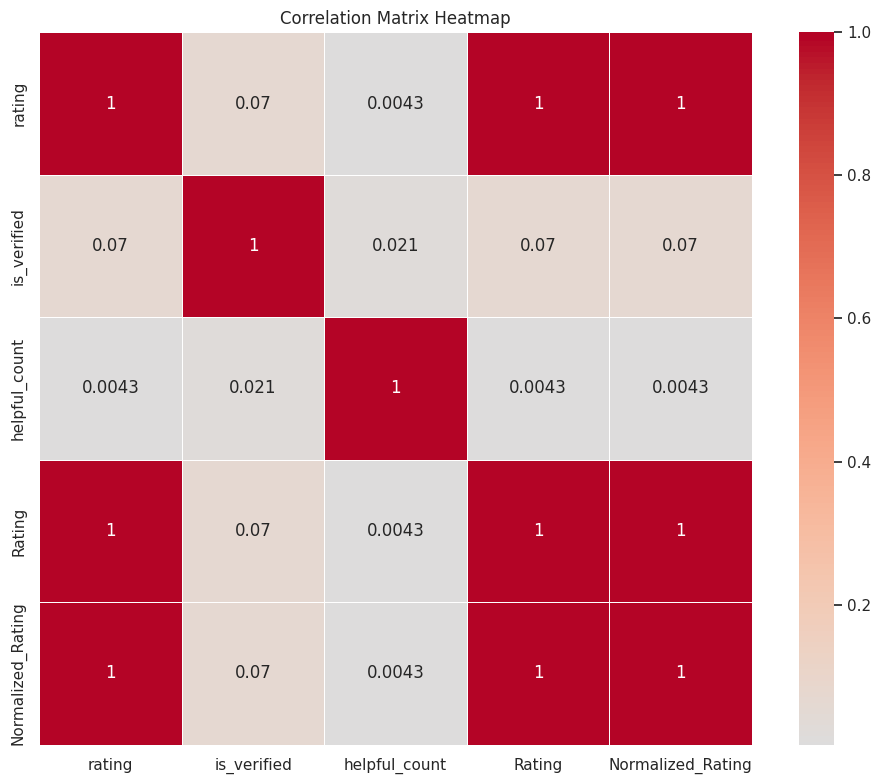

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

In [52]:
# Filter correlations above 0.5 or below -0.5
significant_correlations = matrix[(matrix > 0.5) | (matrix < -0.5)]
print(significant_correlations)

                   rating  is_verified  helpful_count  Rating  \
rating                1.0          NaN            NaN     1.0   
is_verified           NaN          1.0            NaN     NaN   
helpful_count         NaN          NaN            1.0     NaN   
Rating                1.0          NaN            NaN     1.0   
Normalized_Rating     1.0          NaN            NaN     1.0   

                   Normalized_Rating  
rating                           1.0  
is_verified                      NaN  
helpful_count                    NaN  
Rating                           1.0  
Normalized_Rating                1.0  


In [56]:
text = "The smartwatch is amazing, but the battery life could be better."
blob = TextBlob(text)

# Extract sentiment
print(blob.sentiment)

Sentiment(polarity=0.55, subjectivity=0.7)


In [64]:
# Create new columns for polarity and subjectivity
df_cleaned['Polarity'] = df_cleaned['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_cleaned['Subjectivity'] = df_cleaned['content'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Preview the updated dataset
print(df_cleaned.head(10))

          review_id  product_id  \
445   RUUJJA0TERA67  B096SV8SJG   
446  R3EO2GBST2UICI  B096SV8SJG   
447  R2D114QWXW4IOU  B096SV8SJG   
448  R29LYUZ7DI2CS6  B096SV8SJG   
449   RRC5SI8P44LH4  B096SV8SJG   
450  R3OTWPP01KM2BY  B096SV8SJG   
451  R3MCOYFNYISC7D  B096SV8SJG   
452  R2MOD3AIAL0RCQ  B096SV8SJG   
453  R3W44HXR3GUPIE  B096SV8SJG   
454  R2FJ02IAUY08JQ  B096SV8SJG   

                                                 title        author  rating  \
445  5.0 out of 5 stars Compared to 4 other Earbuds...        Connor       5   
446  5.0 out of 5 stars Initial review and comparis...  philip seitz       5   
447           5.0 out of 5 stars I think they’re great         Maizy       5   
448  4.0 out of 5 stars Quality sound and build, BU...       Everest       4   
449  5.0 out of 5 stars Excellent -- Budget Friendl...   Mary Trotta       5   
450          3.0 out of 5 stars actually disappointing         kimmy       3   
451  5.0 out of 5 stars Bought for fiance and she l...

In [69]:
df_cleaned['Subjectivity'].describe()

,Subjectivity
count,451.000000
mean,0.531530
std,0.143717
min,0.000000
25%,0.471696
50%,0.532042
75%,0.600000
max,1.000000


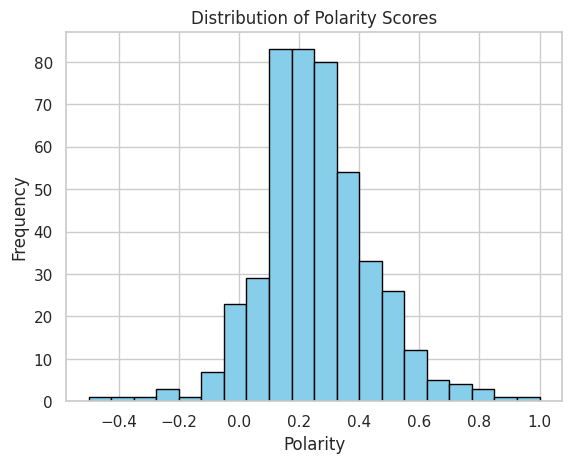

In [76]:
# Plot histogram of polarity
plt.hist(df_cleaned['Polarity'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Polarity Scores")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()

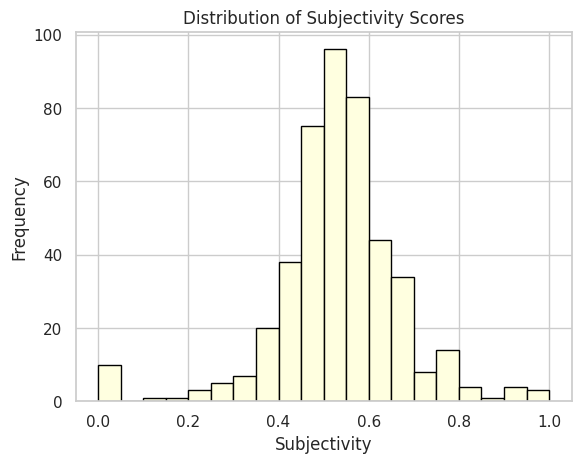

In [77]:
# Plot histogram of Subjectivity
plt.hist(df_cleaned['Subjectivity'], bins=20, color='lightyellow', edgecolor='black')
plt.title("Distribution of Subjectivity Scores")
plt.xlabel("Subjectivity")
plt.ylabel("Frequency")
plt.show()

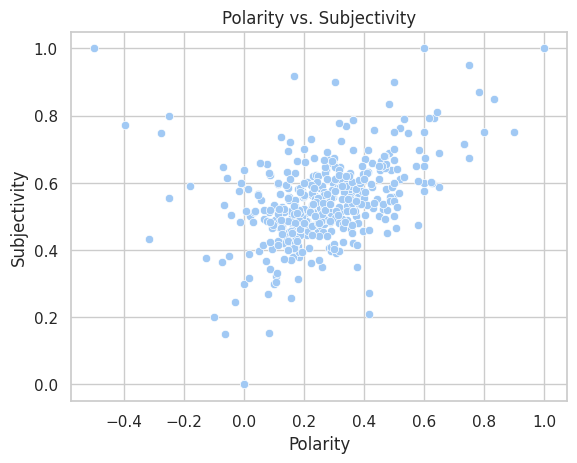

In [83]:
# Scatter plot
sns.scatterplot(x='Polarity', y='Subjectivity', data=df_cleaned, alpha=1.0)
plt.title("Polarity vs. Subjectivity")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [84]:
def categorize_sentiment(polarity):
    if polarity > 0.2:
        return 'Positive'
    elif polarity < -0.2:
        return 'Negative'
    else:
        return 'Neutral'

# Apply categorization
df_cleaned['Sentiment'] = df_cleaned['Polarity'].apply(categorize_sentiment)

# Count the number of each sentiment
print(df_cleaned['Sentiment'].value_counts())

Sentiment
Positive    268
Neutral     177
Negative      6
Name: count, dtype: int64


<Axes: xlabel='Sentiment'>

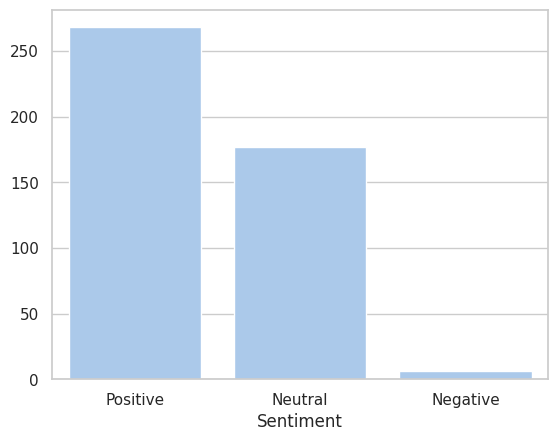

In [85]:
sns.barplot(x=df_cleaned['Sentiment'].value_counts().index, y=df_cleaned['Sentiment'].value_counts().values)

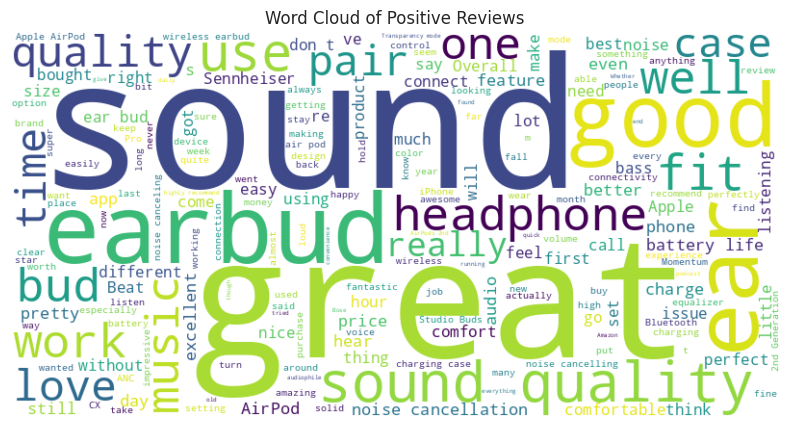

In [87]:
# Generate word cloud for positive reviews
positive_reviews = " ".join(df_cleaned[df_cleaned['Sentiment'] == 'Positive']['content'])
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(positive_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Positive Reviews")
plt.show()